## Overview

### The Data

I used Burak Ergun's loan data set<cite data-cite="data"></cite>.

### Goal of Analysis
The goal of this analysis is development of Machine learning models that can predict the 
loan eligibility of a customer based on customer details for example Gender, 
Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others.

### Importing the  required Libraries
 
The libraries used are `prettytable`<cite data-cite="Maurits2009"></cite>, `seaborn`<cite data-cite="Waskom2021"></cite>, `matplotlib`<cite data-cite="Caswell2019"></cite>, `scikit-learn`<cite data-cite="Pedregosa2011"></cite>, `numpy`<cite data-cite="Harris2020"></cite>, and `pandas`<cite data-cite="Reback2020"></cite>.

In [1]:
# Importing  required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
from sklearn.ensemble import ExtraTreesClassifier
from numpy import array
import seaborn as sns
import prettytable
import os

## Importing the data and getting a glimpse of it

In [2]:
loandata = pd.read_csv(os.path.join(os.getcwd(),"loan_data_set.csv"))

In [3]:
loandata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loandata.shape

(614, 13)

##  Data Exploration 

In [5]:
loandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


There are 614 observations  and  13 variables in this data set. Among 13 variables 8 categorical variables,
4 continuous variables, and 1 variable to accommodate the loan ID.

In [6]:
loandata.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
#To describe categorical columns
loandata.describe(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


### Checking for duplicate rows

In [8]:
# Is there any duplicte row?
loandata.duplicated().sum()

0

No, There are not any duplicates

### Let's Explore  Categorical Variables

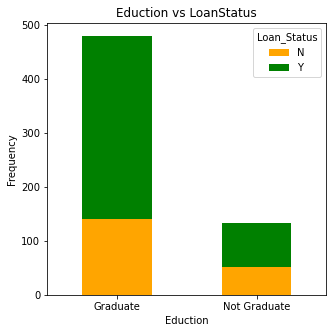

In [9]:
pd.crosstab(loandata.Education ,loandata.Loan_Status).plot(kind="bar", stacked=True, figsize=(5,5), color=['orange','green'])
plt.title('Eduction vs LoanStatus')
plt.xlabel('Eduction')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

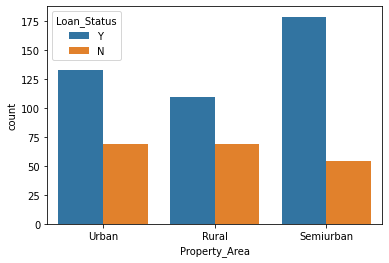

In [10]:
sns.countplot(x=loandata.Property_Area ,data=loandata,hue='Loan_Status')

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

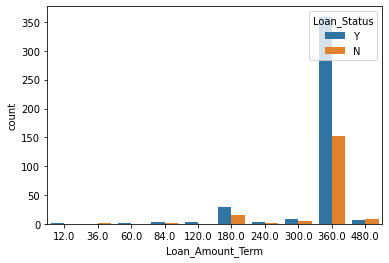

In [11]:
sns.countplot(x=loandata.Loan_Amount_Term,data=loandata,hue='Loan_Status')

### let's explore our numerical variables

Is there any relation between Credit_History and Loan_Status?

In [12]:
pd.crosstab(loandata["Credit_History"], loandata["Loan_Status"], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


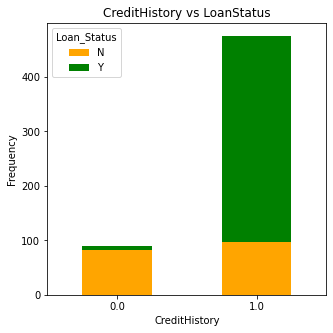

In [13]:
pd.crosstab(loandata.Credit_History,loandata.Loan_Status).plot(kind="bar", stacked=True, figsize=(5,5), color=['orange','green'])
plt.title('CreditHistory vs LoanStatus')
plt.xlabel('CreditHistory')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

Yes, the applicants with Credit_History 1 are  get more approval for loan more then compare to whom have Credit_History=0

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

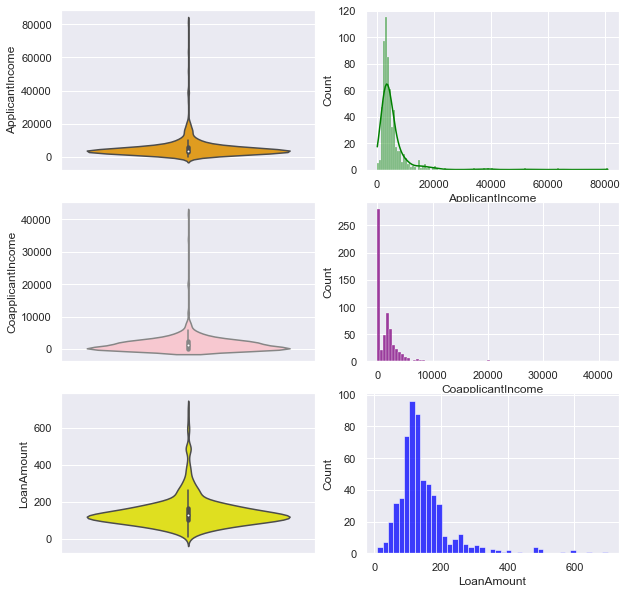

In [14]:
sns.set(style="darkgrid")
fig, axs1 = plt.subplots(3, 2, figsize=(10, 10))
sns.violinplot(data=loandata,  y="ApplicantIncome",ax=axs1[0, 0] , color='orange') 
sns.histplot(data=loandata, x="ApplicantIncome", kde=True, ax=axs1[0, 1], color='green')
sns.violinplot(data=loandata, y="CoapplicantIncome", ax=axs1[1, 0],color='pink')
sns.histplot(data=loandata, x="CoapplicantIncome", ax=axs1[1, 1], color='purple')
sns.violinplot(data=loandata, y="LoanAmount", ax=axs1[2, 0],color='yellow')
sns.histplot(data=loandata, x="LoanAmount", ax=axs1[2, 1], color='blue')

The distribution of LoanAmount,ApplicantIncome and coapplicantIncome  are right skewed and  it has outliers.
let's Normalized it.

In [15]:
loandata["LoanAmount_log"] = np.log(loandata["LoanAmount"])

<AxesSubplot:xlabel='LoanAmount_log', ylabel='Count'>

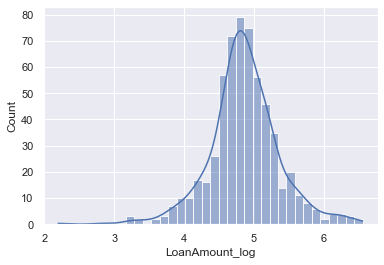

In [16]:
sns.histplot(data=loandata, x="LoanAmount_log", kde=True)

The distribution after using normalization are much better compared to original distribution.

# Data Preprocessing

 ### Checking for missing values

In [17]:
loandata.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

In [18]:
loandata.isnull().sum().sum()

171

Yes, There are total 171 missing values.
Let's handle the missing values

## Filling in missing values

In [19]:
loandata['Gender'].fillna(loandata['Gender'].mode()[0],inplace=True)
loandata['Married'].fillna(loandata['Married'].mode()[0], inplace=True)
loandata['Dependents'].fillna(loandata['Dependents'].mode()[0],inplace=True)
loandata["Self_Employed"].fillna(loandata["Self_Employed"].mode()[0], inplace = True)
loandata.LoanAmount = loandata.LoanAmount.fillna(loandata.LoanAmount.mean())
loandata.Loan_Amount_Term = loandata.Loan_Amount_Term.fillna(loandata.Loan_Amount_Term.mean())
loandata.Credit_History = loandata.Credit_History.fillna(loandata.Credit_History.mean())
loandata.LoanAmount_log = loandata.LoanAmount_log.fillna(loandata.LoanAmount_log.mean())

In [20]:
loandata.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

## Adding a new TotalIncome columnn and normalizing it

In [21]:
loandata["TotalIncome"] = loandata["ApplicantIncome"] + loandata["CoapplicantIncome"]

In [22]:
loandata["TotalIncome_log"] = np.log(loandata["TotalIncome"])

<AxesSubplot:xlabel='TotalIncome_log', ylabel='Count'>

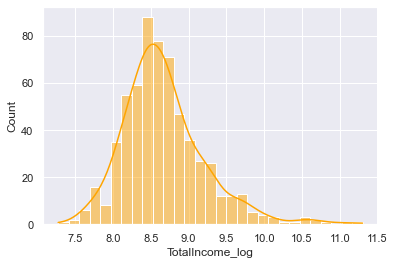

In [23]:
sns.histplot(data=loandata, x="TotalIncome_log", kde=True, color="orange")

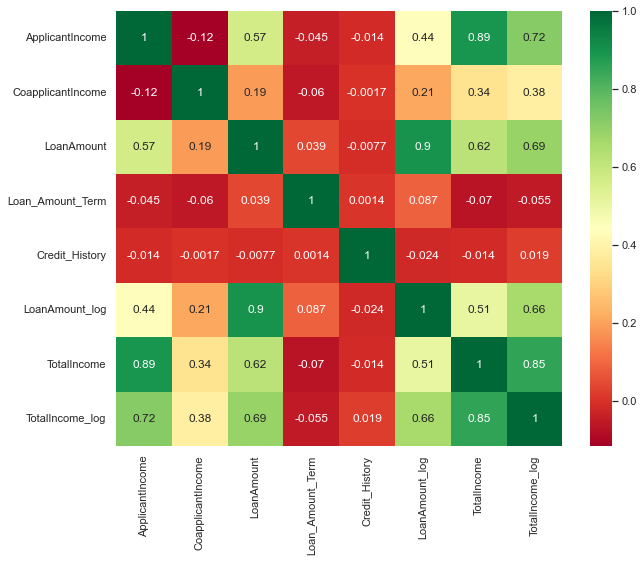

In [24]:
#get correlations of each features in dataset
corrmat = loandata.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,8))
#plot heat map
g=sns.heatmap(loandata[top_corr_features].corr(),annot=True,cmap="RdYlGn")

There is postive correlation between totalIncome and LoanAmount

## Features Importance

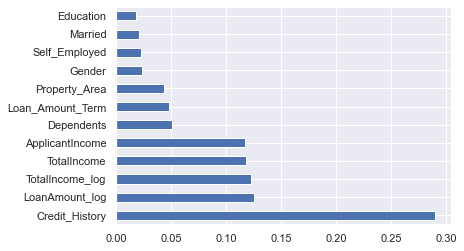

In [28]:
le=LabelEncoder()
dfle = loandata
dfle.Gender=le.fit_transform(dfle.Gender)
dfle.Married =le.fit_transform(dfle.Married)
dfle.Dependents=le.fit_transform(dfle.Dependents)
dfle.Education=le.fit_transform(dfle.Education)
dfle.Self_Employed=le.fit_transform(dfle.Self_Employed)
dfle.Loan_Status= le.fit_transform(dfle.Loan_Status)
dfle.Property_Area =le.fit_transform(dfle.Property_Area)
X = dfle.drop(["Loan_Status", "Loan_ID",   "CoapplicantIncome", "LoanAmount"], axis=1)
Y = dfle["Loan_Status"]
ss =StandardScaler()
x = ss.fit_transform(X)

feat_importance=pd.Series(model.feature_importances_, index=X.columns)
feat_importance.nlargest(12).plot(kind='barh')
plt.show()

Converting Categorical variables to numeric format and split the dataset for training and testing

In [169]:
def data_processing(loandata):
    X=loandata.iloc[:,np.r_[1:6,9:12,13, 15]].values
    Y=loandata.iloc[:,12].values
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)
    le_x = LabelEncoder()
    for i in range(0,6):
        X_train[:,i]=le_x.fit_transform(X_train[:,i])
        
    X_train[:,7]=le_x.fit_transform(X_train[:,7])
    for i in range(0,5):
        X_test[:,i]=le_x.fit_transform(X_test[:,i])
    X_test[:,7]= le_x.fit_transform(X_test[:,7])
    le_y =LabelEncoder()
    Y_train=le_y.fit_transform(Y_train)
    Y_test = le_y.fit_transform(Y_test)
    ss =StandardScaler()
    X_train =ss.fit_transform(X_train)
    X_test = ss.fit_transform(X_test)
    return X_train, X_test, Y_train, Y_test
    

In [170]:
X_train, X_test, Y_train, Y_test=data_processing(loandata)

# Models

### Logistic Regression

In [171]:
def logistic_classifier(loandata):
    X_train, X_test,Y_train, Y_test = data_processing(loandata)
    log_reg_classifier = LogisticRegression()
    log_reg_classifier.fit(X_train, Y_train)
    pred_y =log_reg_classifier.predict(X_test)
    #Accuracy_LG = np.mean(pred_y == Y_test)
    TP, FN, FP, TN = confusion_matrix(Y_test, pred_y).ravel()
    accuracy = metrics.accuracy_score(pred_y, Y_test)
    TPR = TP/(TP + FN) 
    TNR = TN/(TN + FP)
    
    return  "Logistic Regression", TP, FN, FP, TN, accuracy,TPR, TNR
    

In [172]:
print("Accuracy of Logistic Regression model is",logistic_classifier(loandata)[-3]*100)

Accuracy of Logistic Regression model is 83.73983739837398


### k-Nearest Neighbors

when k= 1 accuracy is 0.7073170731707317
when k= 3 accuracy is 0.7967479674796748
when k= 5 accuracy is 0.8211382113821138
when k= 7 accuracy is 0.8130081300813008
when k= 9 accuracy is 0.7967479674796748
when k= 11 accuracy is 0.7886178861788617
when k= 13 accuracy is 0.8130081300813008
when k= 15 accuracy is 0.8211382113821138
when k= 17 accuracy is 0.8211382113821138
when k= 19 accuracy is 0.8211382113821138


Text(0, 0.5, 'accuracy')

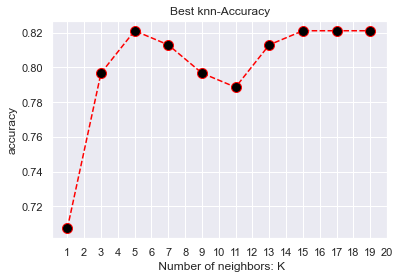

In [173]:
knn_accuracy =[]
for k in range(1,21,2):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, Y_train)
    pred_k = knn_classifier.predict(X_test)
    result = np.mean(pred_k == Y_test)
    knn_accuracy.append(result)
    print('when k=',k, 'accuracy is', result)
    
ax = plt.gca()
plt.plot(range(1,21,2),knn_accuracy, color='red', linestyle = 'dashed',
         marker='o', markerfacecolor='black', markersize=10)
plt.title("Best knn-Accuracy")
plt.xticks(np.arange(1,21,1))
plt.xlabel(" Number of neighbors: K")
plt.ylabel("accuracy")

In [174]:
def kNN_classifier(loandata):
    X_train, X_test,Y_train, Y_test = data_processing(loandata)
    knn_classifier = KNeighborsClassifier(n_neighbors=17)
    knn_classifier.fit(X_train, Y_train)
    pred_y =knn_classifier.predict(X_test)
    TP, FN, FP, TN = confusion_matrix(Y_test, pred_y).ravel()
    TPR = TP/(TP + FN) 
    TNR = TN/(TN + FP)
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    return  "KNN classifier", TP, FN, FP, TN, accuracy,TPR, TNR

In [175]:
print("Accuracy of KNN classifier model is",kNN_classifier(loandata)[-3]*100)

Accuracy of KNN classifier model is 82.11382113821138


### Gaussian NB

In [176]:
def naive_bayes(loandata):
    X_train,X_test, Y_train, Y_test= data_processing(loandata)
    NB_classifier = GaussianNB()
    NB_classifier.fit(X_train, Y_train)
    pred_y = NB_classifier.predict(X_test)
    TP, FN, FP, TN = confusion_matrix(Y_test, pred_y).ravel()
    TPR = TP/(TP + FN) 
    TNR = TN/(TN + FP)
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    return  "Naive Bayes classifier", TP, FN, FP, TN, accuracy,TPR, TNR

In [177]:
print("Accuracy of Naive bayes classifier model is",naive_bayes(loandata)[-3]*100)

Accuracy of Naive bayes classifier model is 82.92682926829268


### Decission Tree  Model

In [178]:

def decission_tree(loandata):
    X_train, X_test, Y_train, Y_test = data_processing(loandata)
    tree_classifier = DecisionTreeClassifier(criterion='gini', random_state=0)
    tree_classifier.fit(X_train, Y_train)
    pred_y = tree_classifier.predict(X_test)
    accuracy = np.mean(pred_y == Y_test)
    confusion_matrix_DT =confusion_matrix(Y_test, pred_y)
    TP, FN, FP ,TN =confusion_matrix_DT.ravel()
    TPR = TP/(TP+FN)
    TNR = TN/(TN+FP)
    return  "Decision Tree", TP, FN, FP, TN, accuracy,TPR, TNR

In [179]:
print("Accuracy of Decission Tree model is",decission_tree(loandata)[-3]*100)

Accuracy of Decission Tree model is 73.17073170731707


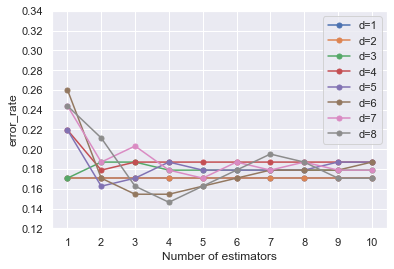

In [180]:
df_new = pd.DataFrame(columns = ['d=1', 'd=2', 'd=3', 'd=4', 'd=5', 'd=6', 'd=7', 'd=8'], index=range(1,11))
for i in range(1,11):
    for j in range(1,9):
        X_train, X_test, Y_train, Y_test = data_processing(loandata)
        model = RandomForestClassifier(n_estimators=i, max_depth=j,criterion='entropy', random_state=0)
        model.fit(X_train, Y_train)
        pred_y = model.predict(X_test)
        error_rate = np.mean(pred_y != Y_test)
        df_new.iloc[i-1, j-1]= error_rate
     
     
x = df_new.index
#colors = ['red', 'blue', 'orange','green','gold', "pink', 'coral', 'purple']
for i in range(0,8):
        plt.plot(x,  df_new[df_new.columns[i]],  marker = 'o', markersize=5)
        plt.legend(df_new.columns, loc='best')
        
plt.xticks(np.arange(1,11 , step=1))
plt.xlabel("Number of estimators")
plt.ylabel("error_rate")
plt.yticks(np.arange(0.12, 0.36, step =0.02))
plt.show()

### Random Forest

In [181]:
def random_forest(loandata):
    X_train,X_test, Y_train, Y_test =data_processing(loandata)
    model = RandomForestClassifier(n_estimators=4, max_depth=8, criterion='entropy', random_state=0)
    model.fit(X_train, Y_train) 
    pred_y = model.predict(X_test) 
    accuracy = np.mean(Y_test == pred_y) 
    TP, FN, FP ,TN=confusion_matrix(Y_test, pred_y).ravel()
    TPR = TP/(TP+FN) 
    TNR = TN/(TN+FP) 
    return  "Random Forest", TP, FN, FP, TN, accuracy,TPR, TNR

In [182]:
print("Accuracy of Random Forest model is",random_forest(loandata)[-3]*100)

Accuracy of Random Forest model is 85.36585365853658


### Support Vector Machine

In [183]:
def  compute_svm(loandata,method, n):
    X_train, X_test,Y_train, Y_test = data_processing(loandata)
    model = SVC(kernel=method , degree=n)
    model.fit(X_train, Y_train)
    pred_y = model.predict(X_test)
    cm = confusion_matrix(Y_test, pred_y)
    TP, FN, FP, TN = cm.ravel()
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    TPR = TP/(TP+FN)
    TNR = TN/(TN+FP)
    
    return  "linear SVM", TP, FN, FP, TN, accuracy,TPR, TNR

In [184]:
print("Accuracy  of linear kernel SVM:", compute_svm(loandata,"linear", 1)[-3])

Accuracy  of linear kernel SVM: 0.8292682926829268


# Model Comparison

In [185]:
table = prettytable.PrettyTable(["Model", "TP", "FN", "FP", "TN", "Accuracy", "TPR", "TNR"])

In [186]:
table.add_row(logistic_classifier(loandata))
table.add_row(kNN_classifier(loandata))
table.add_row(naive_bayes(loandata))
table.add_row(decission_tree(loandata))
table.add_row(random_forest(loandata))
table.add_row(compute_svm(loandata, "linear", 1))
print(table)

+------------------------+----+----+----+----+--------------------+---------------------+--------------------+
|         Model          | TP | FN | FP | TN |      Accuracy      |         TPR         |        TNR         |
+------------------------+----+----+----+----+--------------------+---------------------+--------------------+
|  Logistic Regression   | 15 | 18 | 2  | 88 | 0.8373983739837398 | 0.45454545454545453 | 0.9777777777777777 |
|     KNN classifier     | 14 | 19 | 3  | 87 | 0.8211382113821138 | 0.42424242424242425 | 0.9666666666666667 |
| Naive Bayes classifier | 14 | 19 | 2  | 88 | 0.8292682926829268 | 0.42424242424242425 | 0.9777777777777777 |
|     Decision Tree      | 19 | 14 | 19 | 71 | 0.7317073170731707 |  0.5757575757575758 | 0.7888888888888889 |
|     Random Forest      | 22 | 11 | 7  | 83 | 0.8536585365853658 |  0.6666666666666666 | 0.9222222222222223 |
|       linear SVM       | 14 | 19 | 2  | 88 | 0.8292682926829268 | 0.42424242424242425 | 0.9777777777777777 |
+

# Conclusion
In general, it can be seen that all models can achieve up to 73% accuracy.

The highest accuracy is 85% which was achived using Random Forest Model.
